In [ ]:
pip install control

     |████████████████████████████████| 357 kB 7.4 MB/s 
  Created wheel for control: filename=control-0.9.1-py2.py3-none-any.whl size=364705 sha256=5e02f810d7c2dbb56fc2e30e9c70e013b1f44a3ff99768fff14c71f71a3fafc6
  Stored in directory: /root/.cache/pip/wheels/b1/50/22/8005107713828997d1af664fbd629c7f935a1b87fc2f4ba6c1
Successfully built control


K de oscilação  5.0


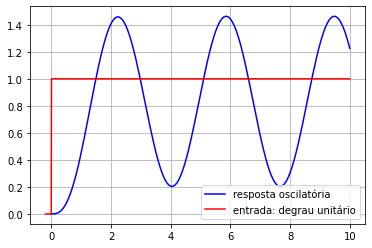

In [ ]:
#importa as bibliotecas
import control as ctl
import matplotlib.pyplot as plt
import numpy as np
# FT da planta
s = ctl.TransferFunction.s
P_s=1/(s**3+2*s**2+3*s+1)

#calcula o ganho crítico e a freq de oscilação
out_st_magn=ctl.stability_margins(P_s)
K_cr=np.round(out_st_magn[0]*1000)/1000
print('K de oscilação ',K_cr)
# calcula FT em malha fechada que oscila
G_s_cr=ctl.series(K_cr, P_s);
G1_s_cr=ctl.feedback(G_s_cr, 1, sign=-1);
#calcula a resposta ao degrau com ganho crítico
Tsim=10
T, yout = ctl.step_response(G1_s_cr, Tsim)
T2=np.linspace(-0.2,Tsim,1000)
degrau=np.ones_like(T2)
degrau[T2<0]=0;
plt.figure()
plt.plot(T,yout,'b-',label="resposta oscilatória");plt.grid()
plt.plot(T2,degrau,'r-',label="entrada: degrau unitário")
plt.legend()